In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Distribution of sample mean

In [4]:
population = np.random.normal(loc=100, scale=10, size=10000) # income
N = len(population)
mu = population.mean()
sigma = population.std()
print('Population Mean is %.2f' % mu)
print('Population sigma is %.2f' % sigma)

Population Mean is 99.98
Population sigma is 9.91


In [5]:
np.random.seed(1)
n = 1000
sample = pd.Series(population).sample(n)
xbar = sample.mean()
s = sample.std()
print('Sample Mean is %.2f' % xbar)
print('Sample sigma is %.2f' % s)

Sample Mean is 100.31
Sample sigma is 9.34


In [12]:
# E(xbar)
sample_means_all = []
for i in range(1000):
    n = 1000
    sample = pd.Series(population).sample(n)
    xbar = sample.mean()
    sample_means_all.append(xbar)
e_xbar = pd.Series(sample_means_all).mean()
print('Expected value of xbar is %.2f' % e_xbar)

Expected value of xbar is 99.97


<AxesSubplot:ylabel='Density'>

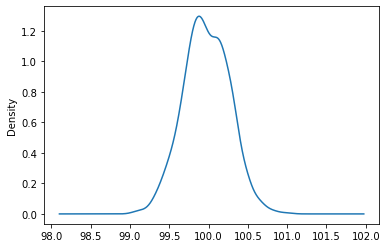

In [13]:
pd.Series(sample_means_all).plot.density()

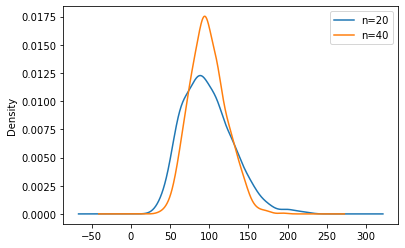

In [19]:
# Var (xbar)
sample_var_all_1 = []
for i in range(1000):
    n = 20
    sample = pd.Series(population).sample(n)
    s2 = sample.var()
    sample_var_all_1.append(s2)
sample_var_all_2 = []
for i in range(1000):
    n = 40
    sample = pd.Series(population).sample(n)
    s2 = sample.var()
    sample_var_all_2.append(s2)    
pd.Series(sample_var_all_1).plot.density()
pd.Series(sample_var_all_2).plot.density()
plt.legend(['n=20', 'n=40'])

In [94]:
np.arange(1,n)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

## Simple Linear Regression

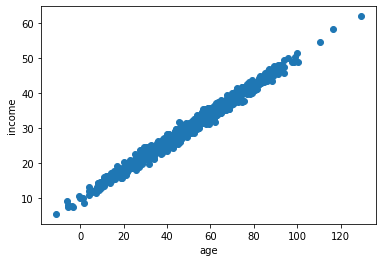

In [99]:
np.random.seed(1)
age = np.random.normal(loc=50, scale=20, size=1000)
m = 0.4
c = 10
income = [m*i + np.random.randn() + c for i in age]

df = pd.DataFrame({
    'age': age,
    'id': np.arange(1,len(age)+1),
    'income': income
})
plt.scatter(age, income)
plt.xlabel('age')
plt.ylabel('income');

In [47]:
df.corr()

,age,income
age,1.000000,0.991549
income,0.991549,1.000000


In [61]:
from scipy.stats import t
tcritical = abs(t.ppf(0.025, df.shape[0]-1))
xbar_low = xbar - tcritical * df['income'].std() / np.sqrt(df.shape[0])
xbar_high = xbar + tcritical * df['income'].std() / np.sqrt(df.shape[0])
print(xbar, tcritical,df['income'].var(),df.shape[0])
print(xbar_low, xbar_high)


30.337825252671408 1.962341461133449 63.069042270410264 1000
29.845011637289115 30.8306388680537


In [31]:
xbar = df['income'].mean()
xbar

30.337825252671408

In [30]:
df.shape

(1000, 2)

In [56]:
df['income'].std() / np.sqrt(df.shape[0])

0.2511355057940041

In [100]:
# Build SLR without any independent variables
import statsmodels.api as sm
#df['age'] = 0
X = sm.add_constant(df[['age', 'id']])
y = df['income']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.913e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:53:31   Log-Likelihood:                -1448.1
No. Observations:                1000   AIC:                             2902.
Df Residuals:                     997   BIC:                             2917.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0046      0.107     93.069      0.000       9.794      10.215
age            0.4011      0.002    241.321      0.000       0.398       0.404
id         -6.906e-05      0.000     -0.611      0.541      -0.000       0.000
==============================================================================
Omnibus:                        0.926   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.971
Skew:                          -0.002   Prob(JB):                        0.615
Kurtosis:                       2.847   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
yhat = model.predict(X)

In [74]:
m_est = model.params['age']
c_est = model.params['const']
prediction = m_est * 82.486907 + c_est
actual = y[0]
error = actual - prediction
error

-0.21694855850423522

In [86]:
df_1 = pd.DataFrame({
    'actual': y,
    'predicted': yhat,
})
df_1['error'] = df_1['actual'] - df_1['predicted']
df_1['sq_error'] = np.square(df_1['error'])
print('SSE', df_1['sq_error'].sum()) # sum of squared error (sse)
print('MSE', df_1['sq_error'].mean()) # mean squared error (mse)
print('RMSE', np.sqrt(df_1['sq_error'].mean())) # Root mean squared error (RMSE)

SSE 1060.470246853005
MSE 1.060470246853004
RMSE 1.0297913608362639


In [87]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_1['actual'], df_1['predicted'])
print('MSE is', mse)
rmse = mean_squared_error(df_1['actual'], df_1['predicted'], squared=False)
print('RMSE is', rmse)

MSE is 1.060470246853005
RMSE is 1.0297913608362643


In [89]:
df[['age', 'income']].cov() 

,age,income
age,385.332977,154.575349
income,154.575349,63.069042


In [93]:
b1_hat = df[['age', 'income']].cov().iloc[0,1] / df['age'].var()
b0_hat = df['income'].mean() - b1_hat * df['age'].mean()
print('B1 is', b1_hat)
print('B0 is', b0_hat)

B1 is 0.40114747108839116
B0 is 9.969061165089794


## Terminologies
- Training stage - Pass input & output to the algorithm
- Algorithm decides on the model
- Prediction stage: You will pass only input & predict target column using the model
- Error, SSE, MSE, RMSE
- Error or Cost Function for linear regression
- Formula for B1 & B0